In [1]:
cd("/g/data/v45/nc3020/Oceananigans-Tutorial-CFP/near-global/")

ENV["JULIA_DEPOT_PATH"] = "/g/data/v45/nc3020/.julia:/share/julia/site/"
ENV["JULIA_LOAD_PATH"] = "@:@v#.#:@stdlib:@site"

using Pkg; Pkg.activate(@__DIR__);

  Activating project at `/g/data/v45/nc3020/Oceananigans-Tutorial-CFP/near-global`


In [2]:
using ClimaOcean.NearGlobalSimulations: one_degree_near_global_simulation

using Oceananigans
using Oceananigans.Units
using Oceananigans.Utils: WallTimeInterval
using Oceananigans.BuoyancyModels: buoyancy
using Oceananigans.Models.HydrostaticFreeSurfaceModels: VerticalVorticityField
using JLD2

[ Info: Oceananigans will use 12 threads
┌ Warning: Multiple CUDA environment variables set to different values: /g/data/hh5/public/apps/miniconda3/envs/analysis3-22.10, /apps/cuda/11.4.1
└ @ CUDA.Deps /g/data/v45/nc3020/.julia/packages/CUDA/BbliS/deps/discovery.jl:268


In [3]:
boundary_layer_turbulence_closure = RiBasedVerticalDiffusivity()

┌ Warning: RiBasedVerticalDiffusivity is an experimental turbulence closure that 
│ is unvalidated and whose default parameters are not calibrated for 
│ realistic ocean conditions or for use in a three-dimensional 
│ simulation. Use with caution and report bugs and problems with physics 
│ to https://github.com/CliMA/Oceananigans.jl/issues.
└ @ Oceananigans.TurbulenceClosures /g/data/v45/nc3020/.julia/packages/Oceananigans/KTw3g/src/TurbulenceClosures/turbulence_closure_implementations/ri_based_vertical_diffusivity.jl:83


RiBasedVerticalDiffusivity{VerticallyImplicitTimeDiscretization}
├── Ri_dependent_tapering: HyperbolicTangentRiDependentTapering
├── κ₀: 0.5
├── κᶜᵃ: 1.7
├── Cᵉⁿ: 0.1
├── Cᵃᵛ: 0.6
├── Ri₀: 0.1
└── Riᵟ: 0.4

In [4]:
start_time = 0days
stop_time  = start_time + 60days

architecture = GPU()

simulation = one_degree_near_global_simulation(architecture;
                                               start_time, stop_time, boundary_layer_turbulence_closure)

[ Info: Reading initial conditions...
[ Info: ... read initial conditions (62.159 ms)
[ Info: Reading boundary conditions...
[ Info: ... read boundary conditions (412.402 ms)


KeyError: KeyError: key "usage_request" not found

KeyError: KeyError: key "usage_request" not found

┌ Info: Created 360×150×48 ImmersedBoundaryGrid{Float64, Periodic, Bounded, Bounded} on GPU with 5×5×5 halo:
│ ├── immersed_boundary: GridFittedBottom(min(h)=-9.02e+03, max(h)=1.00e+02)
│ ├── underlying_grid: 360×150×48 LatitudeLongitudeGrid{Float64, Periodic, Bounded, Bounded} on GPU with 5×5×5 halo and with precomputed metrics
│ ├── longitude: Periodic λ ∈ [-180.0, 180.0) regularly spaced with Δλ=1.0
│ ├── latitude:  Bounded  φ ∈ [-75.0, 75.0]   regularly spaced with Δφ=1.0
└ └── z:         Bounded  z ∈ [-5244.5, 0.0]  variably spaced with min(Δz)=10.0, max(Δz)=410.5
[ Info: Building a model...


KeyError: KeyError: key "usage_request" not found

┌ Info: ... built HydrostaticFreeSurfaceModel{GPU, ImmersedBoundaryGrid}(time = 0 seconds, iteration = 0)
│ ├── grid: 360×150×48 ImmersedBoundaryGrid{Float64, Periodic, Bounded, Bounded} on GPU with 5×5×5 halo
│ ├── timestepper: QuasiAdamsBashforth2TimeStepper
│ ├── tracers: (T, S)
│ ├── closure: Tuple with 4 closures:
│ │   ├── HorizontalScalarDiffusivity{ExplicitTimeDiscretization}(ν=50000.0, κ=(T=0.0, S=0.0, e=50000.0))
│ │   ├── RiBasedVerticalDiffusivity{VerticallyImplicitTimeDiscretization}
│ │   ├── VerticalScalarDiffusivity{VerticallyImplicitTimeDiscretization}(ν=PiecewiseConstantVerticalDiffusivity(-49.0, 0.01, 0.0001), κ=(T=1.0e-5, S=1.0e-5))
│ │   └── IsopycnalSkewSymmetricDiffusivity(κ_skew=900.0, κ_symmetric=900.0)
│ ├── buoyancy: SeawaterBuoyancy with g=9.80665 and BoussinesqEquationOfState{Float64} with ĝ = NegativeZDirection()
│ ├── free surface: ImplicitFreeSurface with gravitational acceleration 9.80665 m s⁻²
│ │   └── solver: MatrixImplicitFreeSurfaceSolver
└ └── cor

Simulation of HydrostaticFreeSurfaceModel{GPU, ImmersedBoundaryGrid}(time = 0 seconds, iteration = 0)
├── Next time step: 20 minutes
├── Elapsed wall time: 0 seconds
├── Wall time per iteration: NaN years
├── Stop time: 60 days
├── Stop iteration : Inf
├── Wall time limit: Inf
├── Callbacks: OrderedDict with 5 entries:
│   ├── stop_time_exceeded => Callback of stop_time_exceeded on IterationInterval(1)
│   ├── stop_iteration_exceeded => Callback of stop_iteration_exceeded on IterationInterval(1)
│   ├── wall_time_limit_exceeded => Callback of wall_time_limit_exceeded on IterationInterval(1)
│   ├── nan_checker => Callback of NaNChecker for u on IterationInterval(100)
│   └── progress => Callback of (::ClimaOcean.NearGlobalSimulations.var"#progress#5"{Vector{UInt64}}) on IterationInterval(10)
├── Output writers: OrderedDict with no entries
└── Diagnostics: OrderedDict with no entries

In [5]:
# Define output
slices_save_interval = 1day
fields_save_interval = 30days
Nx, Ny, Nz = size(simulation.model.grid)

dir = pwd() * "/output"

closure_name = typeof(boundary_layer_turbulence_closure).name.wrapper
output_prefix = "near_global_$(Nx)_$(Ny)_$(Nz)_$closure_name"

"near_global_360_150_48_RiBasedVerticalDiffusivity"

In [6]:
model = simulation.model

simulation.output_writers[:checkpointer] = Checkpointer(model; dir,
                                                        prefix = output_prefix * "_checkpointer",
                                                        schedule = WallTimeInterval(10minutes),
                                                        cleanup = true,
                                                        overwrite_existing = true)

simulation.output_writers[:fields] = JLD2OutputWriter(model, merge(model.velocities, model.tracers); dir,
                                                      schedule = TimeInterval(slices_save_interval),
                                                      filename = output_prefix * "_fields",
                                                      with_halos = true,
                                                      overwrite_existing = true)

slice_indices = [(:, :, Nz), (:, :, Nz-10)]
output_names = [:surface, :near_surface]

for n = 1:2
    indices = slice_indices[n]

    outputs = Dict()

    for name in keys(model.tracers)
        c = model.tracers[name]
        outputs[name] = Field(c; indices)
    end

    outputs[:u] = Field(model.velocities.u; indices)
    outputs[:v] = Field(model.velocities.v; indices)
    outputs[:w] = Field(model.velocities.w; indices)
    outputs[:η] = model.free_surface.η
    outputs[:ζ] = VerticalVorticityField(model.grid, model.velocities; indices)

    name = output_names[n]
    simulation.output_writers[name] = JLD2OutputWriter(model, outputs; dir,
                                                       schedule = TimeInterval(slices_save_interval),
                                                       filename = output_prefix * "_fields_$name",
                                                       with_halos = true,
                                                       overwrite_existing = true)
end

┌ Warning: model.closure contains a function somewhere in its hierarchy and will not be checkpointed.
└ @ Oceananigans.OutputWriters /g/data/v45/nc3020/.julia/packages/Oceananigans/KTw3g/src/OutputWriters/checkpointer.jl:86


In [7]:
# start with small timestep

spinup = 5days
simulation.Δt = 5minute
stop_time = simulation.stop_time
simulation.stop_time = time(simulation) + spinup

@info "Running spinup simulation with Δt = $(prettytime(simulation.Δt)) until t = $(prettytime(spinup))"
run!(simulation)



# now increase timestep

simulation.stop_time = start_time + stop_time - spinup
simulation.Δt = 60minutes

@info "Running simulation with Δt = $(prettytime(simulation.Δt)) until t = $(prettytime(spinup))"
run!(simulation)

@info "Simulation took $(prettytime(simulation.run_wall_time))."

[ Info: Running spinup simulation with Δt = 5 minutes until t = 5 days
[ Info: Initializing simulation...
[ Info: Time:    0 seconds, iteration: 0, max(|u|): 0.00e+00 ms⁻¹, wmax: 0.00e+00, loc: (1, 1, 1), wall time: 29.705 seconds
[ Info:     ... simulation initialization complete (31.314 seconds)
[ Info: Executing initial time step...
[ Info:     ... initial time step complete (5.717 minutes).
[ Info: Time:   50 minutes, iteration: 10, max(|u|): 1.31e-01 ms⁻¹, wmax: 8.72e-04, loc: (352, 21, 19), wall time: 6.281 minutes
[ Info: Time:  1.667 hours, iteration: 20, max(|u|): 3.17e-01 ms⁻¹, wmax: 1.22e-03, loc: (353, 21, 15), wall time: 1.444 seconds
[ Info: Time:  2.500 hours, iteration: 30, max(|u|): 5.21e-01 ms⁻¹, wmax: 1.68e-03, loc: (352, 21, 19), wall time: 489.331 ms
[ Info: Time:  3.333 hours, iteration: 40, max(|u|): 5.13e-01 ms⁻¹, wmax: 2.13e-03, loc: (352, 21, 19), wall time: 1.332 seconds
[ Info: Time:  4.167 hours, iteration: 50, max(|u|): 6.28e-01 ms⁻¹, wmax: 2.45e-03, loc: 

In [17]:
# saved_output_filename = output_prefix * "_fields_surface" * ".jld2"
saved_output_filename = "output/near_global_1440_600_48_RiBasedVerticalDiffusivity_fields_surface.jld2"

"output/near_global_1440_600_48_RiBasedVerticalDiffusivity_fields_surface.jld2"

In [18]:
using Oceananigans
using Oceananigans.Units

In [19]:
backend = OnDisk()
η_t = FieldTimeSeries(saved_output_filename, "η"; backend)
ζ_t = FieldTimeSeries(saved_output_filename, "ζ"; backend)

times = ζ_t.times

113-element Vector{Float64}:
      0.0
  21600.0
  43200.0
  64800.0
  86400.0
 108000.0
 129600.0
 151200.0
 172800.0
 194400.0
 216000.0
 237600.0
 259200.0
      ⋮
      2.1816e6
      2.2032e6
      2.2248e6
      2.2464e6
      2.268e6
      2.2896e6
      2.3112e6
      2.3328e6
      2.3544e6
      2.376e6
      2.3976e6
      2.4192e6

In [20]:
λη, φη, zη = nodes(η_t[1])
λζ, φζ, zζ = nodes(ζ_t[1])

([-180.0, -179.75, -179.5, -179.25, -179.0, -178.75, -178.5, -178.25, -178.0, -177.75  …  177.5, 177.75, 178.0, 178.25, 178.5, 178.75, 179.0, 179.25, 179.5, 179.75], [-75.0, -74.75, -74.5, -74.25, -74.0, -73.75, -73.5, -73.25, -73.0, -72.75  …  72.75, 73.0, 73.25, 73.5, 73.75, 74.0, 74.25, 74.5, 74.75, 75.0], [-5039.25, -4640.25, -4264.25, -3911.25, -3581.25, -3274.25, -2990.25, -2729.25, -2491.25, -2276.225  …  -95.095, -85.025, -75.005, -65.0, -55.0, -45.0, -35.0, -25.0, -15.0, -5.0])

In [21]:
using CairoMakie

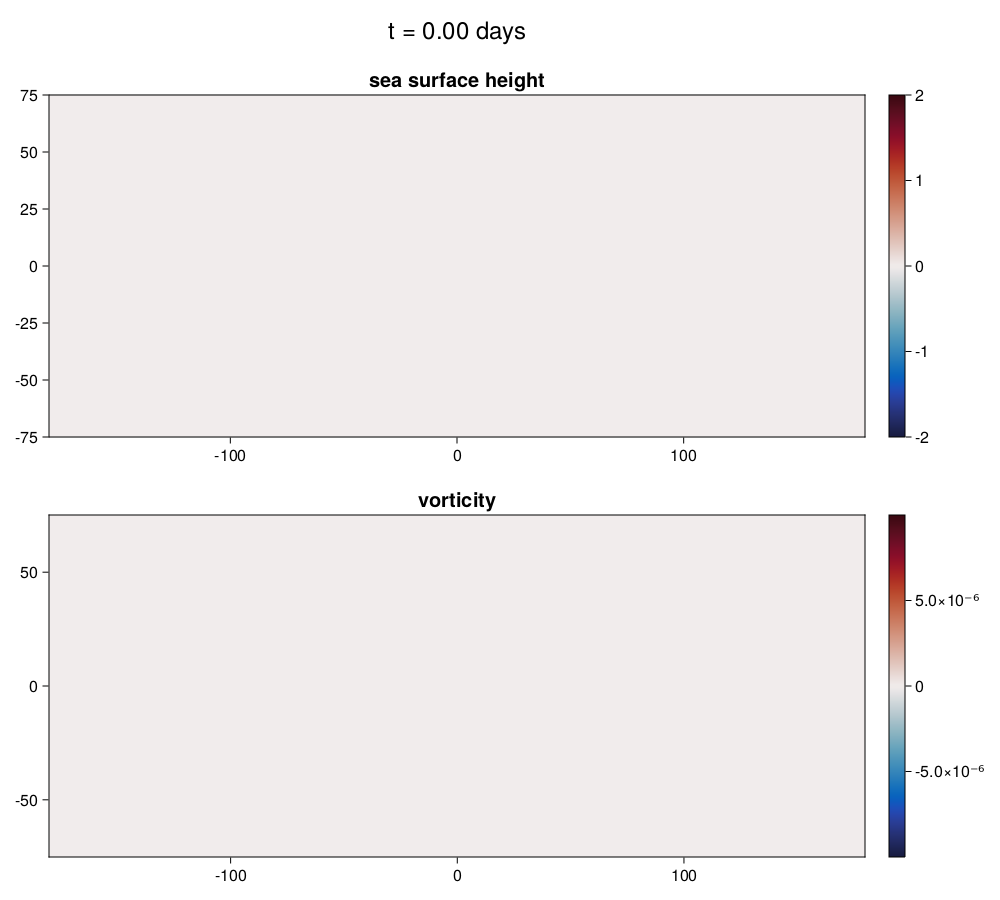

In [22]:
n = Observable(1)

using Printf
title = @lift @sprintf("t = %1.2f days", round(times[$n]/day, digits=2))

ηₙ = @lift interior(η_t[$n], :, :, 1)
ζₙ = @lift interior(ζ_t[$n], :, :, 1)

axis_kwargs = (titlesize = 20,)

ηlim   = 2
ζlim   = 1e-5

fig = Figure(resolution = (1000, 900))

ax_η = Axis(fig[2, 1];
            title = "sea surface height", axis_kwargs...)

ax_ζ = Axis(fig[3, 1];
            title = "vorticity", axis_kwargs...)

fig[1, :] = Label(fig, title, fontsize=24, tellwidth=false)

hm_η = heatmap!(ax_η, λη, φη, ηₙ;
                colorrange = (-ηlim, ηlim),
                colormap = :balance)
Colorbar(fig[2, 2], hm_η)

hm_ζ = heatmap!(ax_ζ, λζ, φζ, ζₙ;
                colorrange = (-ζlim, ζlim),
                colormap = :balance)
Colorbar(fig[3, 2], hm_ζ)

fig

In [23]:
@info "Making a movie from saved data..."

frames = 1:length(times)

CairoMakie.record(fig, "one_degree.mp4", frames, framerate=24) do i
    msg = string("Plotting frame ", i, " of ", frames[end])
    print(msg * " \r")
    n[] = i
end

[ Info: Making a movie from saved data...


"one_degree.mp4"